## Goal of notebook

This notebook aims to quantify the effect of neglecting topological effects in the Stein dynamics. To do this, we investigate the output samples on a one-dimensional von Mises distribution.

# Import tools

In [1]:
from models.vonMises import vM
from src.samplers import samplers
from scripts.plot_helper_functions import collect_samples
import numpy as np
%matplotlib inline
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
import corner
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt

# Setup von Mises distribution

In [2]:
kappa = 100
mu = 0 # Intrinsic angle
mu_vmf = np.array([1, 0]) # Direction in R^2
model = vM(kappa=kappa, mu=mu)

# Visualize von Mises

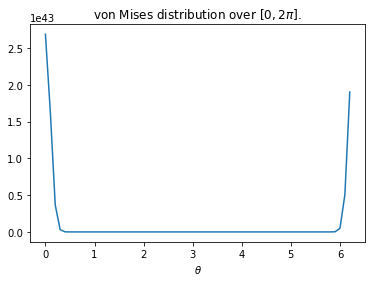

In [3]:
domain = np.arange(0, 2 * np.pi, .1)
range = np.exp(-1 * model.getMinusLogPosterior_ensemble(domain[..., np.newaxis]))
plt.xlabel(r'$\theta$')
plt.title(r'von Mises distribution over $[0, 2\pi]$.')
plt.plot(domain, range)

# Run dynamics

In [29]:
sampler1 = samplers(model=model, nIterations=100, nParticles=50, profile=False)
sampler1.apply(method='SVGD', eps=0.01)

Stepsize 0.010000 | Median bandwidth: 0.089211: 100%|██████████| 100/100 [00:00<00:00, 141.55it/s]


INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\sSVN_GW\outdir\1656787496\output_data.h5


# Get summary statistics

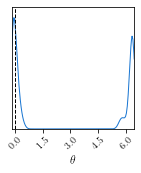

In [30]:
X1 = collect_samples(sampler1.history_path)
params = [r"$\theta$"]
c = ChainConsumer().add_chain(X1, parameters=params)
summary = c.analysis.get_summary()
fig = c.plotter.plot_distributions(truth=[0])
# fig1 = corner.corner(X1) # X1 is one-dimensional

# Visualize samples on $\mathbb{S}^1 \hookrightarrow \mathbb{R}^2$

In [31]:
n_ground_truth = 500
ground_truth_samples = model.sample_vMF(mu=mu_vmf, kappa=kappa, num_samples=n_ground_truth)
x = np.cos(X1)
y = np.sin(X1)

C:\Users\Alex\AppData\Local\Temp\ipykernel_27256\2536241254.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


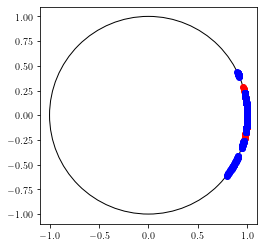

In [32]:
fig1, ax = plt.subplots()
circle = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_patch(circle)
ax.scatter(ground_truth_samples[:,0], ground_truth_samples[:,1], c='r')
ax.scatter(x, y, c='b')
ax.set_box_aspect(1)
fig1.show()

# Remarks
(1) Particles (most likely due to mode collapse) do not explore past the modes at the edges. Hence, they remain in bounds.
(2) One may impose periodic boundary conditions for particles to jump over if necessary.
(3) Upon visual inspection, the particles appear to behave appropriately!



# Conclusion
This suggests that perhaps topological effects of $S^1$ are not prohibitive as a first approximation.
Performance will most likely be diminished due to the difficulty SVGD has sampling multi-modal targets.